In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MyNLP import WordDivider

list = []
df1 = pd.read_csv('CSV/corona_work_depression/corona_work_depression.csv', encoding='shift_jis', header=None)
df2 = pd.read_csv('CSV/corona_work_depression/corona_work_depression2.csv', encoding='shift_jis', header=None)
df3 = pd.read_csv('CSV/corona_work_depression/corona_work_depression3.csv', encoding='shift_jis', header=None)
df4 = pd.read_csv('CSV/corona_work_depression/corona_work_depression4.csv', encoding='cp932', header=None)
df5 = pd.read_csv('CSV/corona_work_depression/corona_work_depression5.csv', encoding='shift_jis', header=None)
df6 = pd.read_csv('CSV/corona_work_depression/corona_work_depression6.csv', encoding='shift_jis', header=None)
df7 = pd.read_csv('CSV/corona_work_depression/corona_work_depression7.csv', encoding='shift_jis', header=None)
df8 = pd.read_csv('CSV/corona_work_depression/corona_work_depression8.csv', encoding='shift_jis', header=None)
df9 = pd.read_csv('CSV/corona_work_depression/corona_work_depression9.csv', encoding='shift_jis', header=None)
df10 = pd.read_csv('CSV/corona_work_depression/corona_work_depression10.csv', encoding='shift_jis', header=None)
df11 = pd.read_csv('CSV/corona_work_depression/corona_work_depression11.csv', encoding='shift_jis', header=None)
df12 = pd.read_csv('CSV/corona_work_depression/corona_work_depression12.csv', encoding='shift_jis', header=None)
df13 = pd.read_csv('CSV/corona_work_depression/corona_work_depression13.csv', encoding='shift_jis', header=None)
df14 = pd.read_csv('CSV/corona_work_depression/corona_work_depression14.csv', encoding='shift_jis', header=None)
list.append(df1)
list.append(df2)
list.append(df3)
list.append(df4)
list.append(df5)
list.append(df6)
list.append(df7)
list.append(df8)
list.append(df9)
list.append(df10)
list.append(df11)
list.append(df12)
list.append(df13)
list.append(df14)
corona_work_depression = []
for index, comments in enumerate(list):
    if index == 1:
        corona_work_depression = comments.iloc[1:, 0].tolist()
    else:
        comments = comments.iloc[1:, 0].tolist()
        for comment in comments:
            corona_work_depression.append(comment)
            
wd = WordDivider()
keitaiso = [wd.wakati_text(text) for text in corona_work_depression]

In [68]:
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
trainings = [TaggedDocument(words = data.split(), tags = [i]) for i, data in enumerate(keitaiso)]
m = Doc2Vec(documents=trainings)
print(m)
#print(m.dv.most_similar(0))
print(m.dv[0])
vecs = []
for i in range(0,len(keitaiso)):
    vecs.append(m.dv[i])

Doc2Vec<dm/m,d100,n5,w5,mc5,s0.001,t3>
[-0.15732951 -0.0017293  -0.03693172  0.08661043  0.02319758 -0.27452528
  0.09159094  0.33653212 -0.2515818  -0.1653311  -0.06384027 -0.20322233
 -0.08834416 -0.05874905  0.12755309 -0.19082426  0.11816283 -0.07597016
 -0.1296302  -0.3613856  -0.00649684  0.09135754  0.05908547 -0.0670618
 -0.05087952  0.03021438 -0.36060894 -0.04113177 -0.17055634 -0.07171026
  0.20960827  0.06463546  0.07552914 -0.14086215 -0.0728715   0.23473065
  0.06006858 -0.208427   -0.11363308 -0.25643048  0.16806926 -0.20173873
 -0.08336749 -0.11707366  0.08856703 -0.01435097 -0.08641674 -0.06049485
  0.1441782   0.04076402  0.0141318  -0.03397473  0.04201341 -0.04791959
 -0.18732639  0.12621577  0.01430733  0.03193843 -0.2933633   0.11024586
  0.13583505  0.18212608  0.09943219 -0.05015165 -0.1379871   0.216246
  0.10809451  0.2609174  -0.35305363  0.08090795 -0.10301317  0.03941154
  0.16704166  0.04260914  0.20902619  0.17779575 -0.0120033  -0.07782122
 -0.12073532 -0

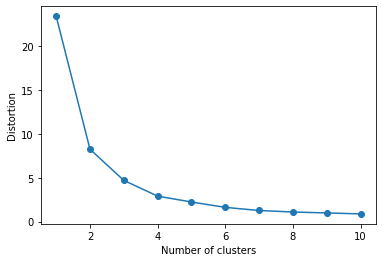

In [69]:
from sklearn.cluster import KMeans

distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++')
    km.fit(vecs)
    distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [62]:
km = KMeans(init ='k-means++', n_clusters=2)
result = km.fit(vecs)
label = result.labels_
print(label)
u, counts = np.unique(label, return_counts=True)
print(u)
print(counts)
print(km.inertia_)

label = pd.DataFrame(label, columns=['cluster'])
comments = pd.DataFrame(corona_work_depression, columns=['comments'])
clustering_result = pd.concat([comments, label], axis=1)
clustering_result.to_csv("./clustering_doc2vec.result2.csv")

[1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1]
[0 1]
[83 47]
8.06692113300645


In [63]:
km = KMeans(init ='k-means++', n_clusters=3)
result = km.fit(vecs)
label = result.labels_
print(label)
u, counts = np.unique(label, return_counts=True)
print(u)
print(counts)
print(km.inertia_)

label = pd.DataFrame(label, columns=['cluster'])
comments = pd.DataFrame(corona_work_depression, columns=['comments'])
clustering_result = pd.concat([comments, label], axis=1)
clustering_result.to_csv("./clustering_doc2vec.result3.csv")

[1 2 2 2 1 1 0 2 2 1 0 1 0 2 1 2 2 1 2 2 0 1 1 0 2 0 0 0 2 0 0 2 0 2 0 2 1
 2 1 0 0 0 0 1 0 2 2 2 2 0 0 2 2 1 2 0 1 2 1 2 0 1 0 1 0 0 0 2 2 0 0 2 2 2
 2 0 0 0 2 2 0 0 0 0 0 0 0 2 2 0 2 1 0 0 0 2 0 2 0 2 1 0 0 2 0 0 0 2 0 0 0
 1 0 2 1 0 0 2 2 0 2 0 2 2 0 1 2 1 2 1]
[0 1 2]
[57 24 49]
4.366723669097329


In [64]:
km = KMeans(init ='k-means++', n_clusters=4)
result = km.fit(vecs)
label = result.labels_
print(label)
u, counts = np.unique(label, return_counts=True)
print(u)
print(counts)
print(km.inertia_)

label = pd.DataFrame(label, columns=['cluster'])
comments = pd.DataFrame(corona_work_depression, columns=['comments'])
clustering_result = pd.concat([comments, label], axis=1)
clustering_result.to_csv("./clustering_doc2vec.result4.csv")

[2 0 0 0 2 2 1 0 0 2 1 2 3 0 0 0 0 2 1 0 1 2 0 1 0 1 1 1 1 1 3 0 1 0 3 1 2
 0 2 1 1 3 3 2 3 1 0 0 0 1 3 0 0 0 1 1 2 0 2 0 1 2 1 2 1 1 1 1 0 1 3 0 1 0
 1 1 3 1 1 0 3 3 1 1 3 3 1 0 0 3 0 2 3 3 3 1 1 0 3 1 2 1 3 0 1 3 1 1 1 1 1
 2 3 0 0 1 3 0 0 3 1 3 1 0 3 0 1 2 0 0]
[0 1 2 3]
[40 47 18 25]
2.6483463073772953
